<a href="https://colab.research.google.com/github/ParisaSaat/ENSF619/blob/master/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #01

This assignment is composed of 4 tasks that your teams is supposed to propose a solution to these tasks that uses  the max-tree. The deliverable for this assignment is:

1. This jupyter-notebook completed with your solution. 
    - Create a GitHub repository and create a folder assignment-01. Put the jupyter-notebook with your solution in this repository and send the instructor the link. The same repository that your team created will be used for submitting the other assignments and your team final project.

You are being assessed based on:

1. Code execution - 20% 
2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 20%
3. Proper usage of the techniques seen in class - 40% 
4. Quality of the results - 20%

More details about the assessment are available in the rubric document in the class GitHub repository.

In [ ]:
# ! git clone https://github.com/rmsouza01/ENSF619.2.git
! git clone https://github.com/rmsouza01/siamxt.git; cd siamxt; python setup.py install

Cloning into 'siamxt'...
remote: Enumerating objects: 218, done.
remote: Total 218 (delta 0), reused 0 (delta 0), pack-reused 218
Receiving objects: 100% (218/218), 3.92 MiB | 20.39 MiB/s, done.
Resolving deltas: 100% (119/119), done.
running install
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/siamxt
copying siamxt/max_tree_c_01.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/morph_tree_alpha.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/morph_tree_alpha_methods.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/max_tree_alpha_aux.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/__init__.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/max_tree_alpha_methods.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/build_max_tree.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/morph_tree_alpha_aux.py -> build/lib.linux-x86_64-3.7/siamxt
copying siamxt/_aux.py -> build/lib.linux

In [ ]:
import numpy as np # numpy is the major library in which siamxt was built upon
                   # we like the array programming style =)

# We are using PIL to read images     
from PIL import Image

# and matplotlib to display images
import matplotlib.pyplot as plt

import siamxt  

**Part 1)** Using the max tree area signature analysis, determined CCs in the max tree
that separate Mona Lisa’s face from the background

(317, 213)


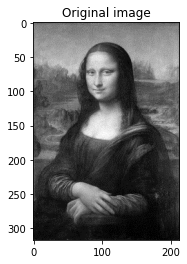

In [ ]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("Images/monalisa.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
# plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...

Text(0.5, 1.0, 'Reconstruction at h = 85')

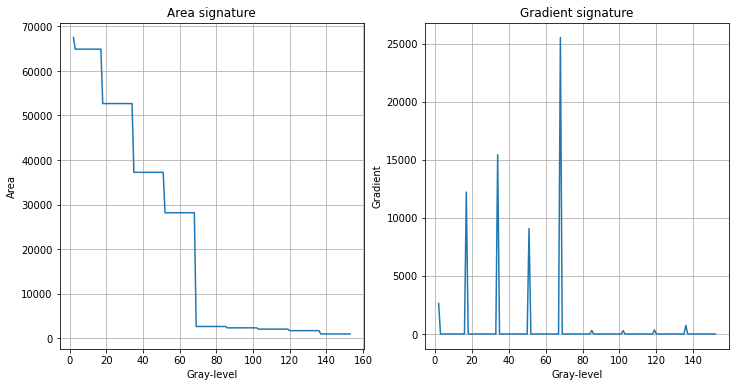

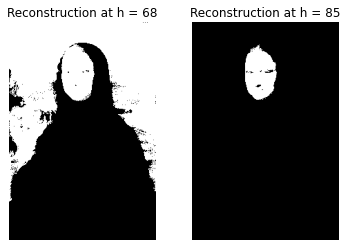

In [ ]:
Bc = np.ones((3,3),dtype = bool)
mxt = siamxt.MaxTreeAlpha(img,Bc)
x,y = 45,100
node = mxt.node_index[x,y]
area = mxt.node_array[3,:]
levels,signature =  mxt.getSignature(area, node)
gradient = signature[0:-1] - signature[1:]

# Display area signature
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.plot(levels,signature)
plt.grid()
plt.xlabel("Gray-level")
plt.ylabel("Area")
plt.title("Area signature")


# Display gradient of the area signature
plt.subplot(122)
plt.grid()
plt.plot(levels[0:-1],gradient)
plt.xlabel("Gray-level")
plt.ylabel("Gradient")
plt.title("Gradient signature")

# Selecting the second peak of the gradient
index = np.argsort(gradient)[::-1][0]

#reconstructing the node corresponding to the peak (largest area)
area1 = signature[index]
node1 = np.where(mxt.node_array[3,:] == area1)[0][0]
cc1 = mxt.recConnectedComponent(node1)

#reconstructing the node corresponding to the peak (smaller area)
area2 = signature[index + 1]
node2 = np.where(mxt.node_array[3,:] == area2)[0][0]
cc2 = mxt.recConnectedComponent(node2)


#Displaying the nodes reconstructed    
fig = plt.figure()
plt.subplot(121)
plt.imshow(cc1, cmap='Greys_r')
plt.axis('off')
plt.title("Reconstruction at h = %d" %mxt.node_array[2,node1])
plt.subplot(122)
plt.imshow(cc2, cmap='Greys_r')
plt.axis('off')
plt.title("Reconstruction at h = %d" %mxt.node_array[2,node2])

**Part 2)** Apply a series of filters to this image to segment the carotid arteries wall

(322, 322)


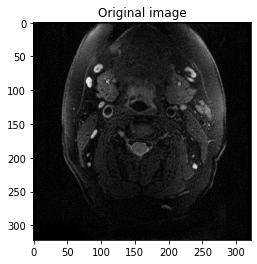

In [ ]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("Images/carotid.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
# plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...

In [ ]:
# Filter parameters
Wmin = 0  # Minimum bounding-box width
Hmin = 0 # Minimum bounding-box height
Wmax = 20 # Maximum bounding-box width
Hmax = 30 # Maximum bounding-box height
rr1 = 0.4 # Minimum rectangularity ratio
rr2 = 0.45

#Structuring element with connectivity-4 
Bc = np.ones((3,3), dtype = bool)

# Building the max-tree of the negated image, i.e. min-tree
mxt = siamxt.MaxTreeAlpha(img,Bc)


# Bounding box-lengths
dx = mxt.node_array[7,:] - mxt.node_array[6,:]
dy = mxt.node_array[10,:] - mxt.node_array[9,:]

# Node selection criteria
nodes = (((centers[:, 1] < 112) & (centers[:, 1] >105)) | ((centers[:, 1] < 210) & (centers[:, 1] >200))) & ((centers[:, 0] < 140) & (centers[:, 0] >126)) 

#Filtering the max-tree
mxt.contractDR(nodes)

# Recovering the filtered the image
img_filtered = mxt.getImage()

 
#Displaying the filtered image
plt.subplot(122)
plt.imshow(img_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("Bounding-box and rectangularity filter")
plt.show()

NameError: ignored

**Parte 3)** Apply a series of filters to remove the white artifacts in the image

(320, 213)


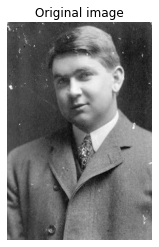

In [ ]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("Images/filtering-image.jpg").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...


Text(0.5, 1.0, 'area-open, area = 45 ')

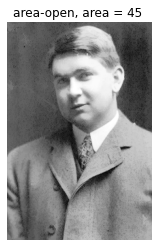

In [ ]:
# Area threshold
area = 45

#Building the max-tree of the negated image, i.e. min-tree
mxt = siamxt.MaxTreeAlpha(img,Bc)


#Applying an area-open filter
mxt.areaOpen(area)

#Recovering the image 
img_filtered =  mxt.getImage()

#Displaying the filtered image
fig = plt.figure()
plt.imshow(img_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("area-open, area = %d " %area)


Text(0.5, 1.0, 'area extinction filter, n= 5 ')

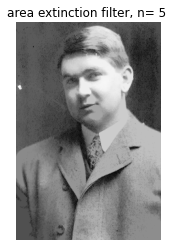

In [ ]:
mxt = siamxt.MaxTreeAlpha(img,Bc)

# Number of leaves to be preserved
n = 5

# Select the area attribute of the max-tree nodes from NA
area = mxt.node_array[3,:]

# Computes the area extinction values
area_ext = mxt.computeExtinctionValues(area,"area")

# Applies the  area extinction filter
mxt.extinctionFilter(area_ext,n)

#Recovering the image 
img_filtered =  mxt.getImage()

#Displaying the filtered image
fig = plt.figure()
plt.imshow(img_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("area extinction filter, n= %d " %n)

Text(0.5, 1.0, 'area-open, area = 50 ')

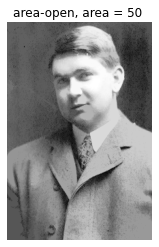

In [ ]:
# Area threshold
area = 50


#Applying an area-open filter
mxt.areaOpen(area)

#Recovering the image 
img_filtered =  mxt.getImage()

#Displaying the filtered image
fig = plt.figure()
plt.imshow(img_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("area-open, area = %d " %area)


**Part 4)** Apply a series of filters that will remove all objects in the image except for the
two pens

(381, 384)


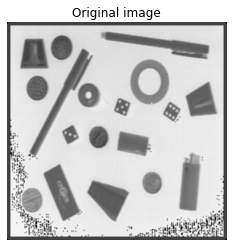

In [ ]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("Images/objects.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...

Text(0.5, 1.0, 'area-open, area = 200 ')

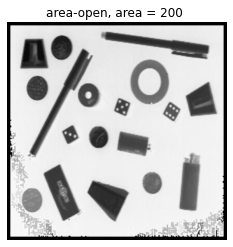

In [ ]:
# Negating the image
img_max = img.max()
img_neg = img_max-img

# Area threshold
area = 200

#Building the max-tree of the negated image, i.e. min-tree
mxt_neg = siamxt.MaxTreeAlpha(img_neg,Bc)

# Making a hard copy of the max-tree
mxt_neg2 = mxt_neg.clone()

#Applying an area-open filter
mxt_neg.areaOpen(area)

#Recovering the image 
img_filtered =  mxt_neg.getImage()

# Negating the image back
img_filtered = img_max -img_filtered

#Displaying the filtered image
fig = plt.figure()
plt.imshow(img_neg, cmap='Greys_r')
plt.axis('off')
plt.title("area-open, area = %d " %area)